<a href="https://colab.research.google.com/github/SergeiVKalinin/MSE_Fall2023/blob/main/Module%206/18_MCMC_Explained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The notebook for the University of Tennessee, Knoxville, Depaertment of Materials Science and Engineering Fall 2023 course, "Introduction in Machine Learning for Materials Science".
- Instructor Sergei V. Kalinin

- These examples are based on the book "Bayesian Analysis with Python" by Oswaldo Martin, https://www.packtpub.com/product/bayesian-analysis-with-python-second-edition/9781789341652

- Warning: the book uses the deprecated PyMC3 library. Current version is PyMC - see https://www.pymc.io/welcome.html
- The adaptation of the code to PYMC is available at the author's GitHub https://github.com/aloctavodia/BAP/tree/master/code_5

## 1D Gaussian

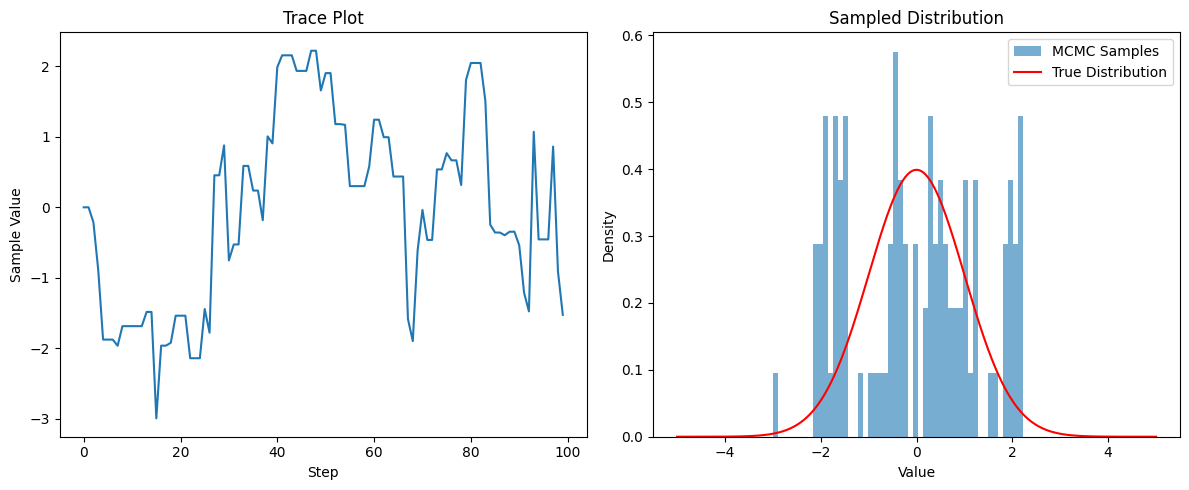

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the target distribution: a 1D Gaussian
def target_distribution(x):
    return np.exp(-0.5 * x**2) / np.sqrt(2 * np.pi)

# Metropolis sampling
def metropolis_sampling(steps=100, proposal_std=1.0):
    samples = []
    current_sample = 0.0  # start from x=0 for simplicity

    for step in range(steps):
        # Propose a new sample
        proposed_sample = current_sample + proposal_std * np.random.randn()

        # Calculate acceptance ratio
        alpha = target_distribution(proposed_sample) / target_distribution(current_sample)

        # Decide to accept or reject the proposed sample
        if np.random.rand() < alpha:
            current_sample = proposed_sample

        samples.append(current_sample)

    return np.array(samples)

samples = metropolis_sampling()

# Plotting
plt.figure(figsize=(12, 5))

# Trace plot
plt.subplot(1, 2, 1)
plt.plot(samples)
plt.title("Trace Plot")
plt.xlabel("Step")
plt.ylabel("Sample Value")

# Histogram
plt.subplot(1, 2, 2)
x = np.linspace(-5, 5, 400)
plt.hist(samples, bins=50, density=True, label="MCMC Samples", alpha=0.6)
plt.plot(x, target_distribution(x), 'r', label="True Distribution")
plt.title("Sampled Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()

## 2D Gaussian

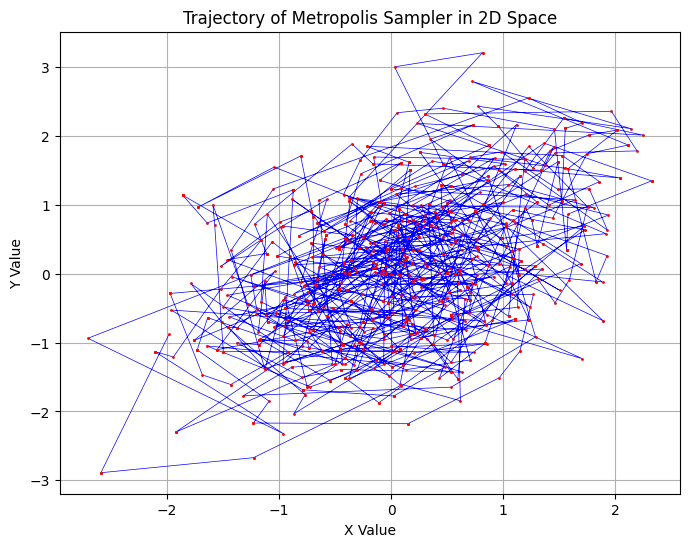

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the 2D target distribution: a 2D Gaussian
def target_distribution(x, y):
    mu = [0, 0]
    cov_matrix = [[1, 0.5], [0.5, 1]]  # slightly correlated dimensions for illustration
    det = np.linalg.det(cov_matrix)
    inv_cov = np.linalg.inv(cov_matrix)

    mahalanobis = (x - mu[0]) ** 2 * inv_cov[0, 0] + 2 * (x - mu[0]) * (y - mu[1]) * inv_cov[0, 1] + (y - mu[1]) ** 2 * inv_cov[1, 1]
    return np.exp(-0.5 * mahalanobis) / (2 * np.pi * np.sqrt(det))

# Metropolis sampling for 2D
def metropolis_sampling_2d(steps=1000, proposal_std=1.0):
    samples = []
    current_sample = np.array([0.0, 0.0])  # start from (0, 0) for simplicity

    for step in range(steps):
        # Propose a new sample in 2D
        proposed_sample = current_sample + proposal_std * np.random.randn(2)

        # Calculate acceptance ratio
        alpha = target_distribution(*proposed_sample) / target_distribution(*current_sample)

        # Decide to accept or reject the proposed sample
        if np.random.rand() < alpha: #1 < alpha:
            current_sample = proposed_sample

        samples.append(current_sample)

    return np.array(samples)

samples_2d = metropolis_sampling_2d()

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(samples_2d[:, 0], samples_2d[:, 1], 'b-', lw=0.5)
plt.plot(samples_2d[:, 0], samples_2d[:, 1], 'r.', markersize=2)
plt.title("Trajectory of Metropolis Sampler in 2D Space")
plt.xlabel("X Value")
plt.ylabel("Y Value")
plt.grid(True)
plt.show()


## Double peak

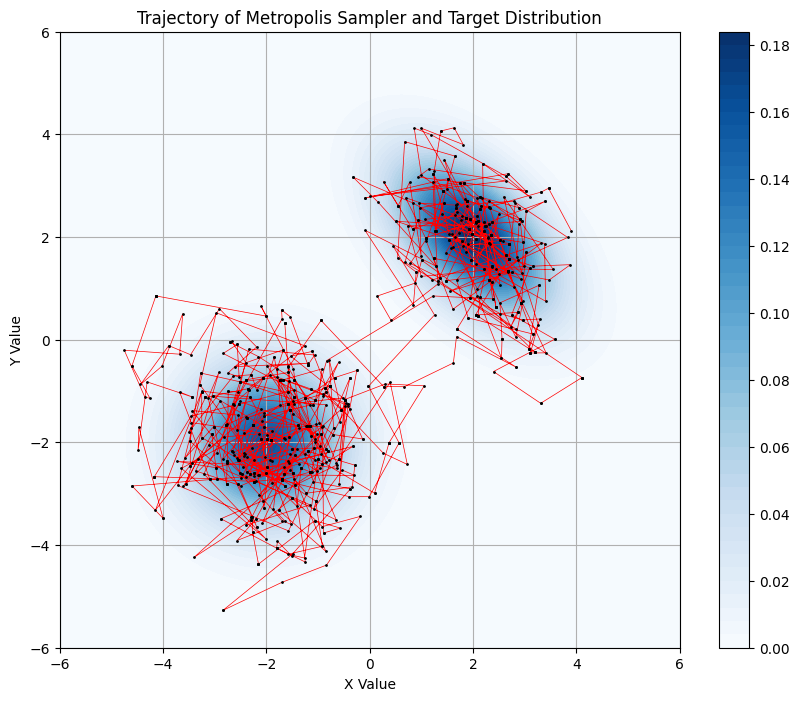

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the 2D target distribution: two separated 2D Gaussian peaks
def target_distribution(x, y):
    # Peak 1
    mu1 = [-2, -2]
    cov1 = [[1, 0], [0, 1]]

    # Peak 2
    mu2 = [2, 2]
    cov2 = [[1, -0.5], [-0.5, 1]]

    # Gaussian function
    def gaussian(x, y, mu, cov):
        det = np.linalg.det(cov)
        inv_cov = np.linalg.inv(cov)
        mahalanobis = (x - mu[0]) ** 2 * inv_cov[0, 0] + 2 * (x - mu[0]) * (y - mu[1]) * inv_cov[0, 1] + (y - mu[1]) ** 2 * inv_cov[1, 1]
        return np.exp(-0.5 * mahalanobis) / (2 * np.pi * np.sqrt(det))

    # Return sum of two peaks
    return gaussian(x, y, mu1, cov1) + gaussian(x, y, mu2, cov2)

# ... [Rest of the Metropolis sampling code remains unchanged] ...

samples_2d = metropolis_sampling_2d(steps=1000, proposal_std=1)

# Generate contour plot for target distribution
x = np.linspace(-6, 6, 200)
y = np.linspace(-6, 6, 200)
X, Y = np.meshgrid(x, y)
Z = np.array([target_distribution(xv, yv) for xv, yv in zip(np.ravel(X), np.ravel(Y))])
Z = Z.reshape(X.shape)

# Plotting
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, Z, 50, cmap="Blues")
plt.colorbar()
plt.plot(samples_2d[:, 0], samples_2d[:, 1], 'r-', lw=0.5)
plt.plot(samples_2d[:, 0], samples_2d[:, 1], 'k.', markersize=2)
plt.title("Trajectory of Metropolis Sampler and Target Distribution")
plt.xlabel("X Value")
plt.ylabel("Y Value")
plt.grid(True)
plt.show()


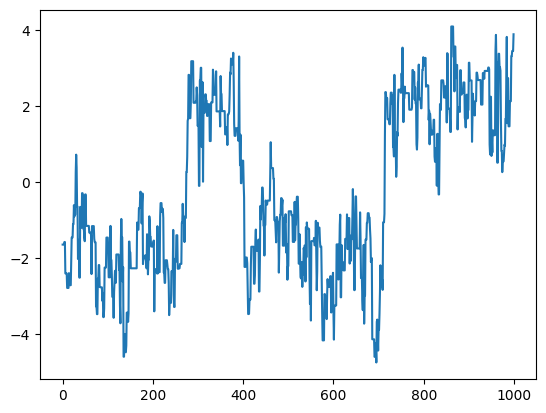

In [11]:
plt.plot(samples_2d[:, 0])

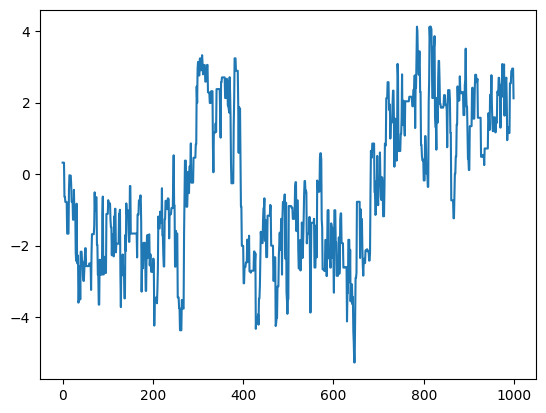

In [12]:
plt.plot(samples_2d[:, 1])